In [1]:
# NO CODE

from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## Confidence Intervals: Interpretation ##

Because of the Central Limit Theorem, confidence intervals for population means are easy to compute if the sample is large. This section is a summary of how to interpret the intervals, and how not to.

### Chance and Confidence ###

As before, our sample consists of observations on $X_1, X_2, \ldots, X_n$ which are i.i.d. with mean $\mu$ and SD $\sigma$. Let $\bar{X}$ be the sample mean. Then for the random interval $\bar{X} \pm 2\frac{\sigma}{\sqrt{n}}$,

$$
P(\mu \in \text{ random interval }) ~ \approx ~ 0.95
$$

by the Central Limit Theorem, and the random interval is called a 95% confidence interval for the fixed parameter $\mu$.

In Data 8, the probability statement above was expressed in terms of long run frequencies as follows:

If you repeat the sampling process 100 times, and construct a 95% confidence interval each time, then about 95 of the 100 intervals will contain the parameter.

Once you have drawn the sample, you get *one observed instance* of the random interval. In the example in the previous section, when we were estimating the average commute distance in a population, the observed value of the random interval came out to be 17.94 miles to 20.06 miles.

This numerical interval is a fixed interval. It's not in one place some of the time and somewhere else the rest of the time. It's always in the same fixed place on the number line.

The parameter is also at a fixed place on the number line.

So the parameter is either always in the interval 17.94 to 20.06, or never in it. 

That is why under the long run frequency theory of probability it doesn't make sense to talk about the chance that the fixed interval 17.94 to 20.06 contains some fixed number, except to say that the chance is either 100% or 0%.

The word *confidence* is used to distinguish the two situations. We say we have about 95% confidence in the observed interval 17.94 to 20.06, because the random process that generated it has the property $P(\mu \in \text{ random interval }) ~ \approx 0.95$.

### Comparison with the Bootstrap ###

The interpretation of the confidence interval is the same as in Data 8, though we are now able to express it in the more succinct and precise language of probability theory.

It's worth checking that the numerical values that we get with our method based on the Central Limit Theorem are close to those we got using the bootstrap in Data 8.

In [2]:
# NO CODE 
births = Table.read_table('../../../data/baby.csv')

As you saw in [Data 8](https://www.inferentialthinking.com/chapters/13/3/Confidence_Intervals.html), the table `births` contains data on a random sample of mothers and their newborn babies. 

In [3]:
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


The sample size is 1174.

In [4]:
n = births.num_rows
n

1174

We will focus on the sample of maternal ages which are measured in years.

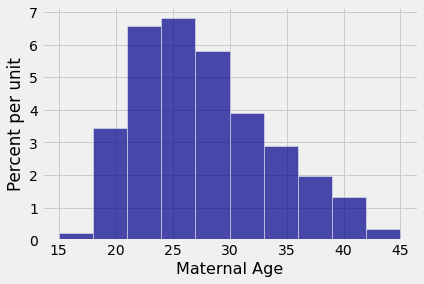

In [5]:
births.hist('Maternal Age')

The sample mean is about 27.23 years and the sample SD is about 5.8 years.

In [6]:
sampled_ages = births.column('Maternal Age')
sample_mean = np.mean(sampled_ages)
sample_SD = np.std(sampled_ages)
sample_mean, sample_SD

(27.228279386712096, 5.8153604041908968)

The SD of the sample mean is approximately $\frac{5.8}{\sqrt{1174}} \approx 0.17$.

In [7]:
approx_SD_of_sample_mean = sample_SD / (n ** 0.5)
approx_SD_of_sample_mean

0.16972373742299796

An approximate 95% confidence interval for the mean maternal age in the population goes from 26.89 years to 27.57 years.

In [8]:
27.23 - 2*0.17, 27.23 + 2*0.17

(26.89, 27.57)

In Data 8 we obtained the confidence interval by using the bootstrap. We started by defining a function that returns one bootstrap mean.

In [9]:
def one_resampled_mean():
    return np.average(births.sample().column('Maternal Age'))

We then called this function repeatedly to create an array of 2,000 bootstrap means:

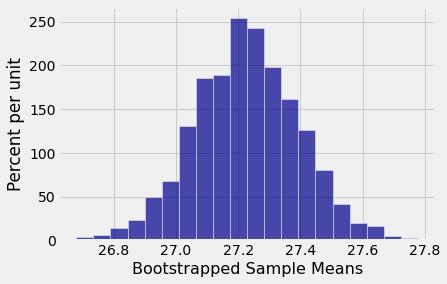

In [10]:
means = make_array()

for i in np.arange(2000):
    means = np.append(means, one_resampled_mean())
    
Table().with_column('Bootstrapped Sample Means', means).hist(0, bins=20)

Finally, we found the "middle 95%" of the bootstrapped means. That was our empirical bootstrap 95% confidence interval for the population mean.

In [11]:
left = percentile(2.5, means)
right = percentile(97.5, means)
left, right

(26.892674616695061, 27.556218057921637)

This interval is pretty close to the interval $(26.89, 27.57)$ that we got using the Central Limit Theorem.

### What the SDs Measure ###
Here is the histogram of the sampled ages again for reference. The arrow on the horizontal axis is at the sample average 27.23.

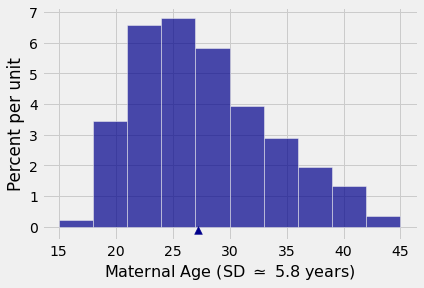

In [12]:
# NO CODE 

births.hist('Maternal Age')
plt.scatter(27.23, -0.001, marker='^', s=60, color='darkblue')
plt.xlabel('Maternal Age (SD $\simeq$ 5.8 years)');

The **SD of the sample** is about 5.8 years. That's the SD of the distribution displayed above. It measures roughly how far the values in the sample are from their mean which is at the arrow.

Most likely, the sample resembles the population. So the SD of the population, $\sigma$, is somewhere around 5.8 years.

A single random draw from the population has the same distribution as the population. If the draws are $X_1, X_2,$ and so on, then for example $SD(X_1) = \sigma$ and hence $SD(X_1)$ is also somewhere around 5.8 years.

As we just saw, the **SD of the sample mean** is

$$
SD(\bar{X}) ~ = ~ \frac{\sigma}{\sqrt{n}} ~ \approx ~ \frac{5.8}{\sqrt{1174}} ~ \approx ~ 0.17 \text{ years}
$$

That's tiny!

The SD of the sample mean measures roughly how far the sample mean is from its expected value. Since $E(\bar{X}) = \mu$, the SD of the sample mean measures roughly how far the sample mean is from the population mean.

The figure below shows the distribution of the sample again, along with its mean. The lighter blue curve that represents what the distribution of the population might look like, and the lighter blue arrow shows the mean of that imagined population.

The SD of the sample mean measures the rough size of the distance between the two arrows. It's tiny because the mean of a large sample is most likely pretty close to the mean of the population.

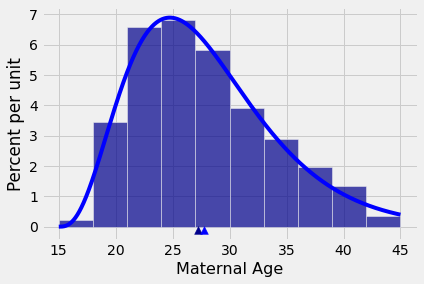

In [13]:
# NO CODE

births.hist(2)
x = np.arange(15, 45.01, .01)
y = stats.gamma.pdf(x-15, 4, loc=0, scale=3.25)
plt.plot(x, y, color='blue')
plt.scatter(27.23, -0.001, marker='^', s=60, color='darkblue')
plt.scatter(27.75, -0.001, marker='^', s=60, color='blue');

### What the Confidence Interval Measures ###

The confidence interval is an interval of estimates of the parameter. In our examples, the confidence interval measures the population mean. It does nothing else.

For example, we have about 95% confidence that the mean maternal age in the population is in the interval 26.89 years to 27.57 years.

It is an unfortunate reality that once numbers have been computed, there are people who want to use them in ways that they shouldn't be used. One common error is to conclude that about 95% of the mothers in the population are between 26.89 and 27.57 years old. But that's just silly.

Look at the histogram and imagine marking the interval 26.89 to 27.57 on the horizontal axis. It's just around where the arrows are, and it's tiny. There is no way that interval contains 95% of the sampled ages or 95% of the ages in the population. It's just where we think the average age in the population is located.